#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 25 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

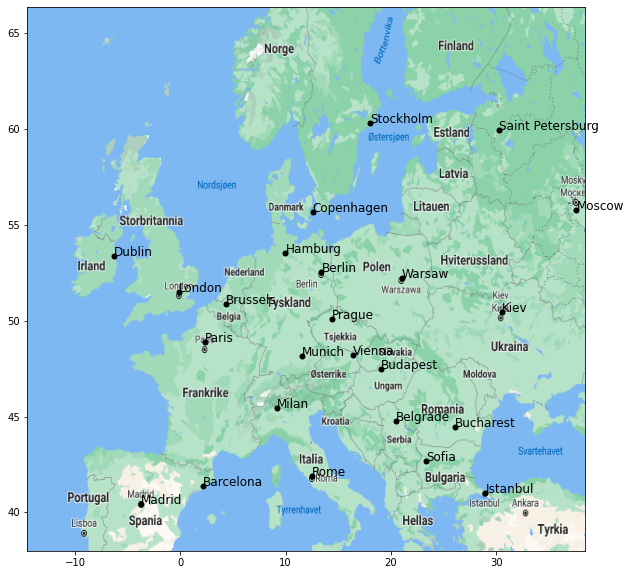

In [7]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [8]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


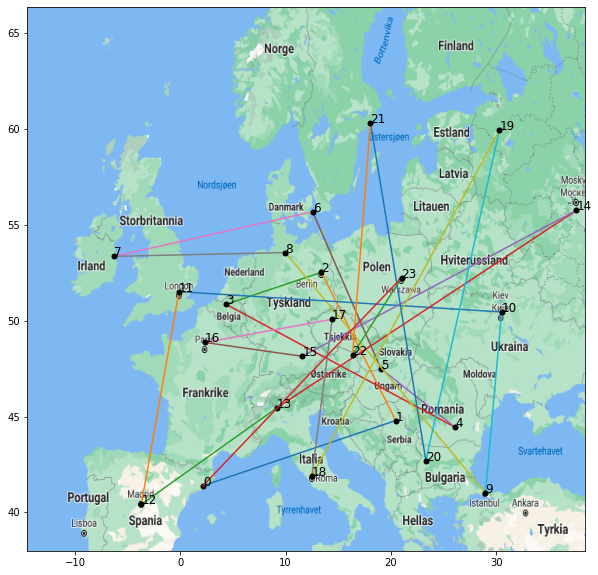

In [5]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

6 cities: 
Best sequence of cities:  ['Bucharest', 'Belgrade', 'Budapest', 'Berlin', 'Brussels', 'Barcelona']
Shortest distance:  3167.32
10 cities: 
Best sequence of cities:  ['Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul']
Shortest distance:  5272.68
Time for finding the best route for 6 cities:  0.002  sec
Time for finding the best route for 7 cities:  0.01  sec
Time for finding the best route for 8 cities:  0.092  sec
Time for finding the best route for 9 cities:  0.935  sec
Time for finding the best route for 10 cities:  10.236  sec
Time to find optimal solution for 24 cities using exhaustive search algorithm:  32.98  million years!


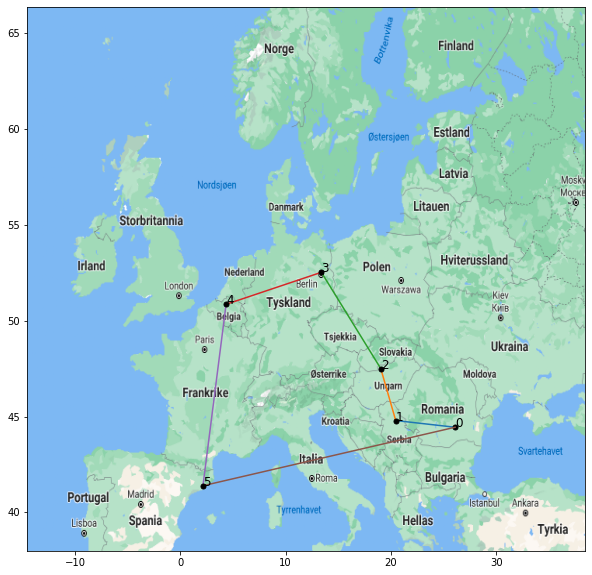

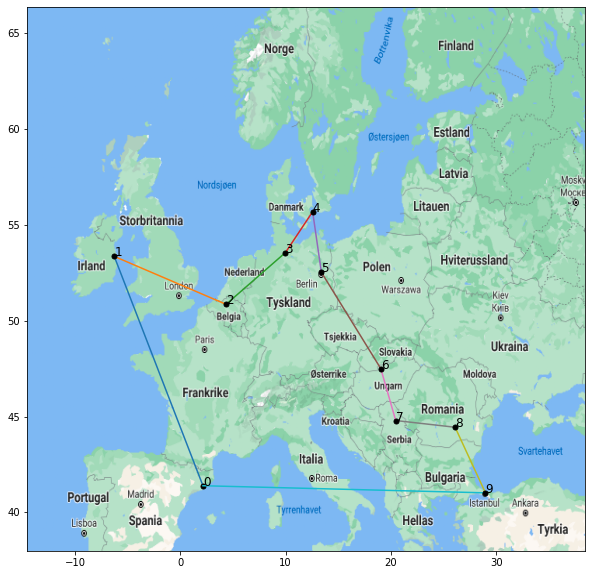

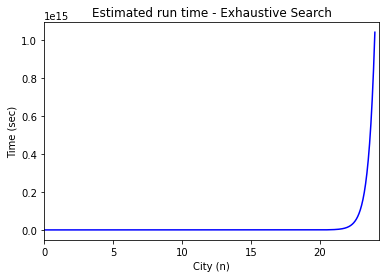

In [23]:
import itertools
import csv
import time
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from IPython.display import display
import pandas as pd
import numpy as np

#Function that finds the distance traveled, given the number of cities.
def optimaDistance(n):
    #Making a list of number of cities, ex. 4 cities: [0,1,2,3]
    listOfcities=[i for i in range(n)]
    #Making all possible perturbations based on number of cities.
    cityPermutations=list(itertools.permutations(listOfcities))
    #Listing city distance and the name of city.
    with open("european_cities.csv", "r") as f:
        data = list(csv.reader(f, delimiter=';'))
        cityNames = data[0]
        cityTravelLengths=data[1:]
    #Here all the posible distances will be listed.   
    listDistanceTraveled=[]
    for i in range(len(cityPermutations)):
        #This parameter sums all the distances.
        distanceTraveled=0
        #List of a certain(i) perturbation.
        cityPermutation=cityPermutations[i]
        for j in range(len(cityPermutation)-1):
            #Distance traveled for a certain combination of cities.
            distanceTraveled=distanceTraveled+float(cityTravelLengths[cityPermutation[j]][cityPermutation[j+1]])
        listDistanceTraveled.append(distanceTraveled)
    
    #Here we find the best distance, that is its place in the list.
    bestPermutation=listDistanceTraveled.index(min(listDistanceTraveled))
    #Shortest distance traveled.
    shortestRoute=round(listDistanceTraveled[bestPermutation],5)
    #The combination of cities that make the shortest possible route.
    shortestCombination=cityPermutations[bestPermutation]
    #The ordering of the cities.
    cityOrder=[]
    for i in range(len(shortestCombination)):
        cityOrder.append(cityNames[shortestCombination[i]])
    #Returing shotest route and the cities traveled.
    return shortestRoute,cityOrder



def exhaustiveSearch():
    totalDistance=optimaDistance(6)[0]
    plan=optimaDistance(6)[1]
    plot_plan(plan)
    plt.savefig('ExhaustiveSearchMap1.png', dpi=300, bbox_inches='tight')
    print("6 cities: ")
    print("Best sequence of cities: ",plan)
    print("Shortest distance: ",totalDistance)
    
    totalDistance=optimaDistance(10)[0]
    plan=optimaDistance(10)[1]
    plot_plan(plan)
    plt.savefig('ExhaustiveSearchMap2.png', dpi=300, bbox_inches='tight')
    print("10 cities: ")
    print("Best sequence of cities: ",plan)
    print("Shortest distance: ",totalDistance)
    
    cityCoord=[]
    bestRoute=[]
    timeCoord=[]
    for i in range(5,10):
        startTime = time.time()
        cityCoord.append(i)
        bestRoute.append(optimaDistance(i+1)[0])
        endTime=time.time()
        timeCoord.append(endTime-startTime)
        
    plt.figure()
    plt.xlabel('City (n)')
    plt.ylabel('Time (sec)')
    plt.title(('Estimated run time - Exhaustive Search'))
    plt.xlim([0, 24.3])
    print("Time for finding the best route for 6 cities: ", round(timeCoord[len(timeCoord)-5],3)," sec")
    print("Time for finding the best route for 7 cities: ", round(timeCoord[len(timeCoord)-4],3)," sec")
    print("Time for finding the best route for 8 cities: ", round(timeCoord[len(timeCoord)-3],3)," sec")
    print("Time for finding the best route for 9 cities: ", round(timeCoord[len(timeCoord)-2],3)," sec")
    print("Time for finding the best route for 10 cities: ", round(timeCoord[len(timeCoord)-1],3)," sec")
    timeCoord=np.log(timeCoord)
    C=np.polyfit(cityCoord, timeCoord, 1)
    cityCoord=np.linspace(0,24,1000)
    timeCoord=np.exp(C[0]*cityCoord+C[1])
    plt.plot(cityCoord,timeCoord,color="blue")
    print("Time to find optimal solution for 24 cities using exhaustive search algorithm: ",round((np.exp(C[0]*24+C[1]))/31536000000000,2)," million years!")
    plt.savefig('ExhaustiveSearch.png', dpi=300, bbox_inches='tight')
    plt.show() 

exhaustiveSearch()

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

------------------------------
Number of runs    | 20
Number of cities  | 24
Time used         | 0.1885
Best run          | 12457.4
Worst run         | 16314.8
Average           | 13926.8
Standard deviation| 986.4
------------------------------
['Belgrade', 'Sofia', 'Istanbul', 'Bucharest', 'Kiev', 'Warsaw', 'Budapest', 'Brussels', 'London', 'Dublin', 'Paris', 'Madrid', 'Barcelona', 'Rome', 'Milan', 'Munich', 'Vienna', 'Prague', 'Berlin', 'Hamburg', 'Copenhagen', 'Stockholm', 'Saint Petersburg', 'Moscow']
------------------------------
Number of runs    | 20
Number of cities  | 10
Time used         | 0.11173
Best run          | 5272.7
Worst run         | 7057.5
Average           | 6004.0
Standard deviation| 668.6
------------------------------
['Barcelona', 'Dublin', 'Brussels', 'Hamburg', 'Copenhagen', 'Berlin', 'Budapest', 'Belgrade', 'Bucharest', 'Istanbul']
Time to find best solutions for 10 and 24 cities:
Time to find global solution for 24 cities using a simple hill climbing algo

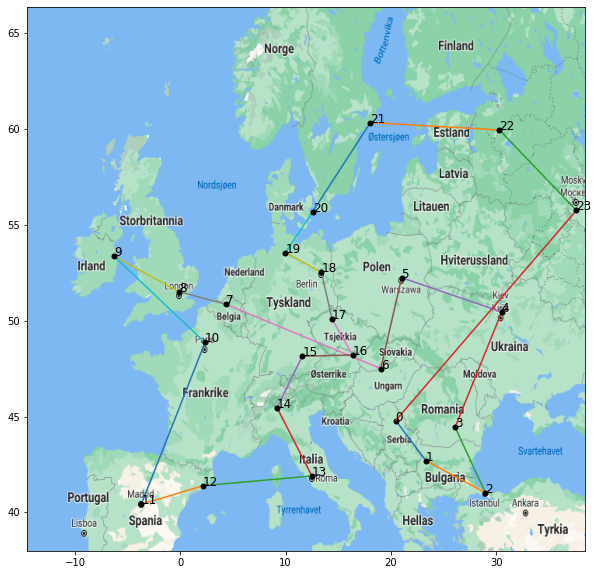

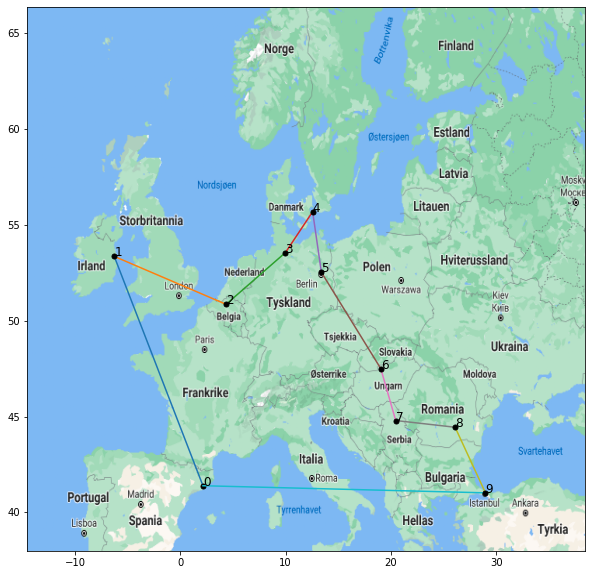

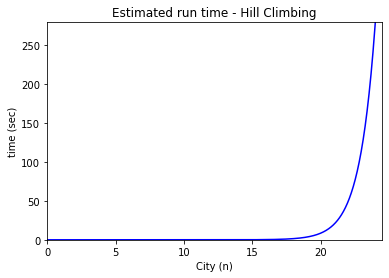

In [25]:
import itertools
import csv
import time
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from IPython.display import display
import pandas as pd
import numpy as np

with open("european_cities.csv", "r") as f:
        data = list(csv.reader(f, delimiter=';'))
        cityNames = data[0]
        cityTravelLengths=data[1:]
        
def randomSearch(n):
    randomConfig=list(range(n))
    randomConfig=random.sample(randomConfig, len(randomConfig)) 
    return randomConfig

def distanceTour(cityDistance):
    totalDistance=0
    for i in range(len(cityDistance)-1):
        totalDistance=totalDistance+float(cityTravelLengths[cityDistance[i]][cityDistance[i+1]])
    return round(totalDistance,3)
    

def swapingNeighbor(randomSearch):  
    crom=randomSearch
    distance=distanceTour(crom)
    
    for i in range(1000):
        gene = random.sample(crom,2)
        crom[gene[0]],crom[gene[1]]=crom[gene[1]],crom[gene[0]]
        tempDistance=distanceTour(crom)
        
        if tempDistance>distance:
            crom[gene[1]],crom[gene[0]]=crom[gene[0]],crom[gene[1]]
        else:
            distance=tempDistance

    return round(distance,5),crom


def printStuff(numberOfCities,numberOfRuns,picN):
    sTime=time.time()
    currentBest=swapingNeighbor(randomSearch(numberOfCities))
    overallBest=currentBest
    allRoutes=[]
    
    bestRoute=[]
    for i in range(numberOfRuns):
        allRoutes.append(currentBest[0])
        if currentBest[0]<overallBest[0]:
            overallBest=currentBest
        currentBest=swapingNeighbor(randomSearch(numberOfCities))
    eTime=time.time()
    diffTime=eTime-sTime
    
    for i in range(len(overallBest[1])):
        bestRoute.append(cityNames[overallBest[1][i]])
    
    print("------------------------------")
    print("Number of runs    |",numberOfRuns)
    print("Number of cities  |",numberOfCities)
    print("Time used         |",round(diffTime,5))
    print("Best run          |",round(np.min(allRoutes),1))
    print("Worst run         |",round(np.max(allRoutes),1))
    print("Average           |",round(np.mean(allRoutes),1))
    print("Standard deviation|",round(np.std(allRoutes),1))
    print("------------------------------")
    plot_plan(bestRoute)
    if picN==0:
        print(bestRoute)
        plt.savefig('Hillclimber1.png', dpi=300, bbox_inches='tight')
    else:
        plt.savefig('Hillclimber2.png', dpi=300, bbox_inches='tight')
        print(bestRoute)
    
def performance(optimaDistance,nCities):
    nCities=[19,20,21,22]
    optimaDistance=[9262,9888,9964,10031]
    repeat=[1,1,1,1]
    
    timeArray=[]
    cityArray=[]
    
    for j in range(len(nCities)):
        for i in range(repeat[j]):
            sTime=time.time()
            currentBest=optimaDistance[j]+1
            while optimaDistance[j]<currentBest:
                currentBest=round(swapingNeighbor(randomSearch(nCities[j]))[0],1)
            eTime=time.time()
            timeArray.append(eTime-sTime)
            cityArray.append(nCities[j])
    

    for i in range(len(timeArray)):
        if timeArray[i]>0:
            timeArray[i]=np.log(timeArray[i])
        else:
            timeArray[i]=np.log(0.00001)
        
    
    plt.figure()
    C=np.polyfit(cityArray, timeArray, 1)
    cityCoord=np.linspace(0,24,1000)
    timeCoord=np.exp(C[0]*cityCoord+C[1])
    plt.title(('Estimated run time - Hill Climbing'))
    plt.xlabel('City (n)')
    plt.ylabel('time (sec)')  
    
    plt.plot(cityCoord,timeCoord,color="blue")
    plt.xlim([0, 24.5])
    plt.ylim([0, timeCoord[len(timeCoord)-1]])

    print("Time to find global solution for 24 cities using a simple hill climbing algorithm: ",round((np.exp(C[0]*24+C[1])),2)," seconds!")
    plt.savefig('HillClimber-fit.png', dpi=300, bbox_inches='tight')
    plt.show()

    
def hillClimbing():
    printStuff(24,20,0)
    printStuff(10,20,1)
    print("Time to find best solutions for 10 and 24 cities:")

    
    #Will take some time (around 15 sec.)
    #The function approximates the time it takes to find the best solutions for all cities.
    performance(1,1)


hillClimbing()


## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

['Munich', 'Istanbul', 'Rome', 'London', 'Madrid', 'Milan', 'Paris', 'Barcelona', 'Belgrade', 'Sofia', 'Bucharest', 'Kiev', 'Berlin', 'Dublin', 'Stockholm', 'Hamburg', 'Copenhagen', 'Prague', 'Vienna', 'Brussels', 'Moscow', 'Saint Petersburg', 'Warsaw', 'Budapest']
------------------------------
Population        | 10
Number of runs    | 20
Tours inspected   | 400
Number of cities  | 24
Time used         | 0.00797
Best run          | 22706.4
Worst run         | 27324.6
Average           | 24650.3
Standard deviation| 1453.2
------------------------------
['Copenhagen', 'Saint Petersburg', 'Moscow', 'Stockholm', 'Budapest', 'Belgrade', 'Kiev', 'Warsaw', 'Paris', 'Dublin', 'Brussels', 'Barcelona', 'Madrid', 'Hamburg', 'Prague', 'Berlin', 'London', 'Milan', 'Rome', 'Vienna', 'Munich', 'Bucharest', 'Istanbul', 'Sofia']
------------------------------
Population        | 100
Number of runs    | 20
Tours inspected   | 4000
Number of cities  | 24
Time used         | 0.07879
Best run          | 

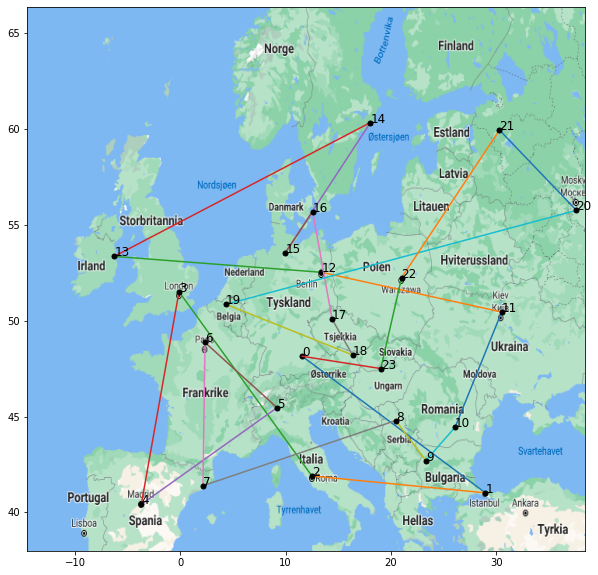

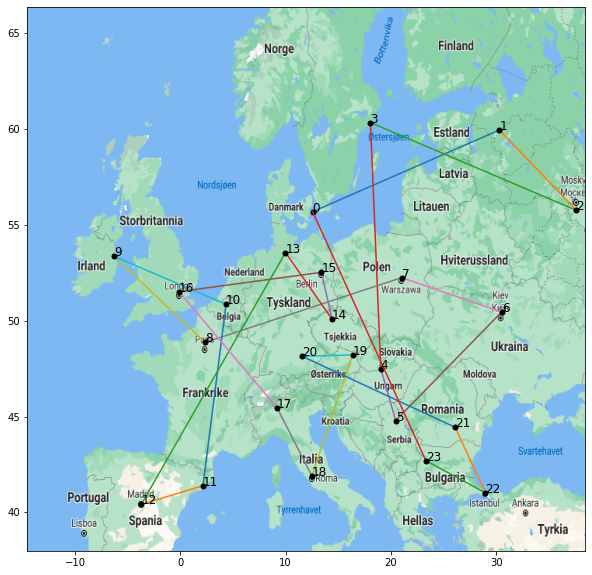

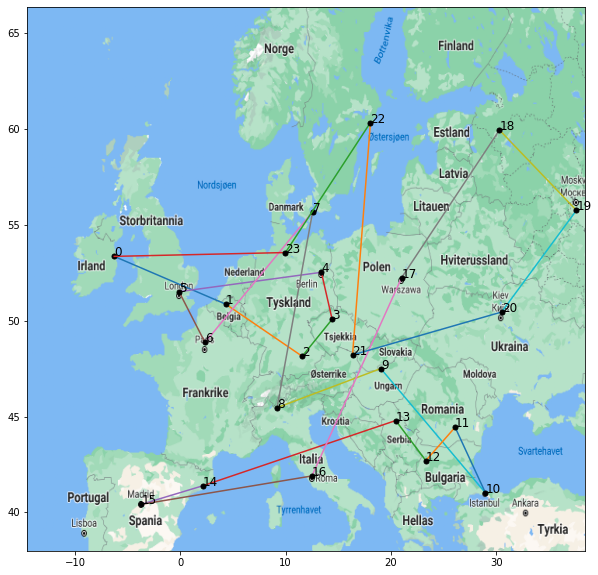

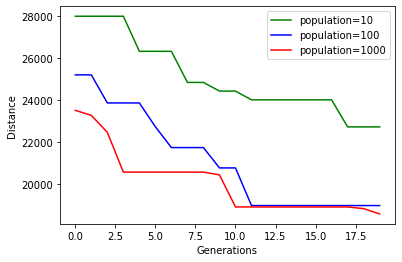

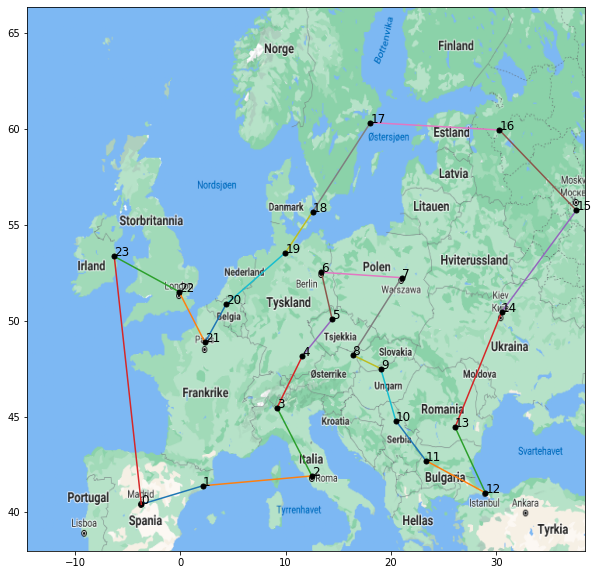

In [26]:
import itertools
import csv
import time
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
from IPython.display import display
import pandas as pd
import numpy as np


with open("european_cities.csv", "r") as f:
        data = list(csv.reader(f, delimiter=';'))
        cityNames = data[0]
        cityTravelLengths=data[1:]

def randomSearch(n):
    randomConfig=list(range(n))
    randomConfig=random.sample(randomConfig, len(randomConfig)) 
    return randomConfig

def distanceTour(cityDistance):
    totalDistance=0
    for i in range(len(cityDistance)-1):
        totalDistance=totalDistance+float(cityTravelLengths[cityDistance[i]][cityDistance[i+1]])
    return round(totalDistance,3)
    

def swapingNeighbor(randomSearch):  
    crom=randomSearch
    distance=distanceTour(crom)
    for i in range(10):
        gene = random.sample(crom,2)
        crom[gene[0]],crom[gene[1]]=crom[gene[1]],crom[gene[0]]
        tempDistance=distanceTour(crom)
        if tempDistance>distance:
            crom[gene[1]],crom[gene[0]]=crom[gene[0]],crom[gene[1]]
        else:
            distance=tempDistance
    return round(distance,5),crom

def swapMutation(parent):
    Chromosome=parent    
    n=len(parent)
    gene1=random.randrange(n)
    gene2=random.randrange(n)
    Chromosome[gene1],Chromosome[gene2]=Chromosome[gene2],Chromosome[gene1]
    return Chromosome

def scrambleMutation(parent):
    Chromosome=parent
    n=len(parent)
    nGenes=random.randrange(2,n)
    genePositions=random.sample(range(0, n), nGenes)
    changePositions=random.sample(genePositions, len(genePositions))
    
    while len(genePositions)>1:
        allele1=genePositions[0]
        allele2=changePositions[0]
        Chromosome[allele1],Chromosome[allele2]=Chromosome[allele2],Chromosome[allele1]
        if genePositions[0]==changePositions[0]:
            del(genePositions[0])
            del(changePositions[0])
        else:
            del(genePositions[genePositions.index(allele1)])
            del(genePositions[genePositions.index(allele2)])
            del(changePositions[changePositions.index(allele2)])
            del(changePositions[changePositions.index(allele1)])
    return Chromosome

def inversionMutation(parent):
    Chromosome=parent
    n=len(parent)
    p=random.sample(range(0, n), 2)
    p.sort()
    tempList=Chromosome[p[0]:p[1]+1]
    mutatedChromosome=[]
    
    for i in range(len(tempList)):
        mutatedChromosome.append(tempList[len(tempList)-i-1])
    mutatedChromosome=Chromosome[0:p[0]]+mutatedChromosome+Chromosome[p[1]+1:]
    return mutatedChromosome

def insertMutation(parent):
    Chromosome=parent
    n=len(parent)
    genes=random.sample(range(0, n), 2)
    
    if genes[0]==n-1:
        Chromosome.insert(genes[0],Chromosome[genes[1]])
        del(Chromosome[genes[1]])
    elif genes[0]>genes[1]:
        Chromosome.insert(genes[0]+1,Chromosome[genes[1]])
        del(Chromosome[genes[1]])
    else:
        Chromosome.insert(genes[0]+1,Chromosome[genes[1]])
        del(Chromosome[genes[1]+1]) 
    return Chromosome

    
    
def orderCrossover(parent1,parent2):
    n=len(parent1)
    child1=[-1]*n
    p=random.sample(range(0, n), 2)
    p.sort()
    child1[p[0]:p[1]+1]=parent1[p[0]:p[1]+1]
    remainingGenes=[]
    for i in range(len(parent2)):
        if parent2[i] not in child1:
            remainingGenes.append(parent2[i])
    child1=remainingGenes[n-p[1]-1:]+parent1[p[0]:p[1]+1]+remainingGenes[0:n-p[1]-1]
    
    
    parent1,parent2=parent2,parent1
    child2=[-1]*n
    p=random.sample(range(0, n), 2)
    p.sort()
    child2[p[0]:p[1]+1]=parent1[p[0]:p[1]+1]
    remainingGenes=[]
    for i in range(len(parent2)):
        if parent2[i] not in child2:
            remainingGenes.append(parent2[i])
    child2=remainingGenes[n-p[1]-1:]+parent1[p[0]:p[1]+1]+remainingGenes[0:n-p[1]-1]
    
    
    return child1,child2


def cycleCrossOver(parent1,parent2):
    p1,p2=parent1,parent2
    n=len(parent1)
    child1=[-1]*len(parent1)
    while -1 in child1:
        element = child1.index(-1)
        l1 = []
        l2 = []
        while element not in l1:
            certainElement = parent1[element]
            l1.append(element)
            l2.append(certainElement)
            element = parent1.index(parent2[element])
        for element,certainElement in zip(l1, l2):
            child1[element] = certainElement
        parent1,parent2 = parent2,parent1
     
    parent1,parent2=p2,p1
    child2=[-1]*len(parent1)
    while -1 in child2:
        element = child2.index(-1)
        l1 = []
        l2 = []
        while element not in l1:
            certainElement = parent1[element]
            l1.append(element)
            l2.append(certainElement)
            element = parent1.index(parent2[element])
        for element,certainElement in zip(l1, l2):
            child2[element] = certainElement
        parent1,parent2 = parent2,parent1
    
    return child1,child2



def PMX(parent1,parent2):
    n=len(parent1)
    p=random.sample(range(0, n), 2)
    p.sort()
    child = [-1]*len(parent1)
    child[p[0]:p[1]] = parent1[p[0]:p[1]]
    for allele in range(len(parent2[p[0]:p[1]])):
        failSafe=0
        gene=(parent2[p[0]:p[1]])[allele]
        if gene not in child:
            while child[allele] != -1:
                failSafe+=1
                allele = parent2.index(parent1[allele])
                if failSafe==len(parent1):
                    break
            child[allele] = gene
    for i in range(len(child)):
        if child[i] == -1:
            for j in range(len(parent2)):
                if parent2[j] not in child:
                    child[i] = parent2[j]
                    
    child1=child
    parent1,parent2=parent2,parent1
    p=random.sample(range(0, n), 2)
    p.sort()
    child = [-1]*len(parent1)
    child[p[0]:p[1]] = parent1[p[0]:p[1]]
    for allele in range(len(parent2[p[0]:p[1]])):
        failSafe=0
        gene=(parent2[p[0]:p[1]])[allele]
        if gene not in child:
            while child[allele] != -1:
                failSafe+=1
                allele = parent2.index(parent1[allele])
                if failSafe==len(parent1):
                    break
            child[allele] = gene    
    for i in range(len(child)):
        if child[i] == -1:
            for j in range(len(parent2)):
                if parent2[j] not in child:
                    child[i] = parent2[j]
    child2=child
    return child1, child2
                
#this is an incomplete crossover operator            
def edgeCrossover(parents):
    n=10
    parent1=randomSearch(n)
    parent1.insert(0,parent1[len(parent1)-1])
    parent1.insert(len(parent1),parent1[1])
    
    parent2=randomSearch(n)
    
    parent2.insert(0,parent2[len(parent2)-1])
    parent2.insert(len(parent2),parent2[1])
    
    edgeList=[0]*(len(parent1)-2)

    for i in range(1,(len(parent1)-1)):
        neighbors=[]
        neighbors.append(parent1[i-1])
        neighbors.append(parent1[i+1])
        edgeList[parent1[i]]=(neighbors)
        pos=parent2[1:(len(parent1)-1)].index(parent1[1:(len(parent1)-1)][i-1])+1
        
        if parent2[pos-1] not in edgeList[parent1[i]]:
            neighbors.append(parent2[pos-1])
        if parent2[pos+1] not in edgeList[parent1[i]]:
            neighbors.append(parent2[pos+1])
    
    print(edgeList)
    child=[]
    for i in range(len(edgeList)):

        lenList=[]
        if i==0:
            checkIndex=0
        
        
        for j in range(len(edgeList[checkIndex])):
            lenList.append(len(edgeList[edgeList[checkIndex][j]]))
        
       
        child.append(checkIndex)
        
        tempIndex=checkIndex
        print(edgeList)
        print(edgeList[tempIndex])
        checkIndex=edgeList[tempIndex][lenList.index(max(lenList))]
        print(edgeList[checkIndex])
        
     
        k=0
        for k in range(len(edgeList)):
            trueFalse=tempIndex in edgeList[k]
            
            if trueFalse==True:
                edgeList[k].remove(tempIndex)
                
            k+=1

    return edgeList

def mutationOperators(parent):
    p=random.random()   
    if 0<p<0.95:
        return inversionMutation(parent)   #best
    if 0.94<p<0.97:
        return insertMutation(parent)      #ok
    if 0.97<p<0.99:
        return swapMutation(parent)        #bad
    if 0.99<p:
        return scrambleMutation(parent)    #worst
    
    
def recombinationOperators(parent1,parent2):
    p=random.random()  
    if 0<p<0.1:    
        return cycleCrossOver(parent1,parent2)  #worst    
    if 0.1<p<0.2:
        return PMX(parent1,parent2)             #ok      
    if 0.2<p<1:        
        return orderCrossover(parent1,parent2)  #best                         
    if p<0:
        return edgeCrossover(parent1,parent2)


    
def selection(nPop,pop_list):
    selectPop=[-1]*2*nPop
    for k in range(nPop):
        if distanceTour(pop_list[nPop+k])<distanceTour(pop_list[k]):
            selectPop[k]=pop_list[nPop+k]
        else:
            selectPop[k]=pop_list[k]   
    
  
    return selectPop    
    
    
#choosing which operators to use
def operators(nPop,pop_list):
    counter =0
    while counter <nPop:
        mutChance=random.random()
        if mutChance <0.01:
            pop_list[nPop+counter]=mutationOperators(pop_list[counter])
            pop_list[nPop+counter+1]=mutationOperators(pop_list[counter+1])
            counter=counter+2
        else:
            mutChild=recombinationOperators(pop_list[counter],pop_list[counter+1])
            pop_list[nPop+counter]=mutationOperators(mutChild[0])
            pop_list[nPop+counter+1]=mutationOperators(mutChild[1])
            counter=counter+2
    
    return pop_list

#choosing inital population based on number of cities and population
def initialPop(nPop,nCities):
    pop_list=[-1]*nPop*2
    for j in range(nPop):
        pop_list[j]=randomSearch(nCities)
    
    return pop_list

#For plotting and printing
def plotPrintStuff(Gen,Fitness,nCities,generation,diffTime,nPop,listOfCities,nMap):
    s=[]
    for i in range(nPop):
        s.append(distanceTour(listOfCities[i]))
    
    routePlan=listOfCities[s.index(min(s))]
    
        
    plan=[]
    for i in range(len(routePlan)):
        plan.append(cityNames[routePlan[i]])
    plot_plan(plan)
    
    if nMap==0:
        plt.savefig('geneticMap4.png', dpi=300, bbox_inches='tight')
    if nMap==1:
        plt.savefig('geneticMap5.png', dpi=300, bbox_inches='tight')
    if nMap==2:
        plt.savefig('geneticMap6.png', dpi=300, bbox_inches='tight')
    print(plan)
    print("------------------------------")
    print("Population        |",nPop)
    print("Number of runs    |",generation)
    print("Tours inspected   |",2*generation*nPop)
    print("Number of cities  |",nCities)
    print("Time used         |",round(diffTime,5))
    print("Best run          |",round(np.min(s),1))
    print("Worst run         |",round(np.max(s),1))
    print("Average           |",round(np.mean(s),1))
    print("Standard deviation|",round(np.std(s),1))
    print("------------------------------")

#Gives best parent in the population
def currentBestGen(nPop,pop):
    s=[]
    for i in range(nPop):
        s.append(distanceTour(pop[i]))
    return min(s)
    
    
    
    
def GA(nPop,nCities,generation):
    stime=time.time()
    pop_list=initialPop(nPop,nCities)
    Gen=[]
    Fitness=[]
    iteration=0
    while iteration<generation:
        Gen.append(iteration)
        Fitness.append(currentBestGen(nPop,pop_list[0:nPop]))
        pop_list=selection(nPop,operators(nPop,pop_list))
        iteration=iteration+1
    etime=time.time()
    diffTime=etime-stime
    return Gen,Fitness,nCities,generation,diffTime,nPop,pop_list[0:nPop]
    

    

    
def mainGA():
    nPop=[10,100,1000]
    nCities=24
    generation=20
    par=[]
    coords=[]
    for i in range(3):
        par.append(GA(nPop[i],nCities,generation))
        plotPrintStuff(par[i][0],par[i][1],par[i][2],par[i][3],par[i][4],par[i][5],par[i][6],i)
        coords.append([par[i][0],par[i][1]])
        
    plt.figure()
    plt.xlabel('Generations')
    plt.ylabel('Distance')

    
    
    
    c=["green","blue","red"]
    
    for i in range(len(coords)):
        x=coords[i][0]
        y=coords[i][1]
        plt.plot(x,y,color=c[i])
        
        
        
        
    plt.legend(['population=10', 'population=100', 'population=1000'])
    plt.savefig('genetic.png', dpi=300, bbox_inches='tight')
    

mainGA()

#This function plots time it takes to find best solution for a given number of cities. 
def findingOptimaltime():
    nPop=20
    nCities=[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    bestDist=[3168,3637,4817,4828,5273,6326,6334,6820,7375,8132,
              8386,8635,8697,9262,9888,9964,10031,10055,10838]
    Time=[]
    for j in range(3):
        for i in range(len(nCities)):
            pop_list=initialPop(nPop,nCities[i])
            stime=time.time()
            fitness=currentBestGen(nPop,pop_list)
            while bestDist[i]<fitness:
                fitness=currentBestGen(nPop,pop_list[0:nPop])
                pop_list=selection(nPop,operators(nPop,pop_list))
           
            
            etime=time.time()
            Time.append(etime-stime)
    
    averageTime=[]
    
    for i in range(len(nCities)):
        averageTime.append((Time[i]+Time[len(nCities)+i]+Time[2*len(nCities)+i])/3)
        
    plt.figure()
    plt.title(('Estimated runtime - pure GA'))
    plt.scatter(nCities,averageTime,s=30,marker ="x",color="red")
    plt.xlabel('City (n)')
    plt.ylabel('Time (sec)')
    x=nCities
    y=np.log(averageTime)
    C=np.polyfit(x,y,1)
    x=np.linspace(0,24,1000)
    y=np.exp(C[0]*x+C[1])
    plt.plot(x,y,color="blue")
    
    
    plt.savefig('geneticTime.png', dpi=300, bbox_inches='tight')

    
#This may take some time.    
#findingOptimaltime()    


def mainGA():
    nCities=[10,24]
    nPop=[20,20]
    generation=[200,10000]
    par=[]
    textTime=["  / 10 sec < t","   / 1 mill year < t"]
    textDis=["/ 5272.7","/ 10837.1 "]
    for i in range(2):
        par.append(GA(nPop[i],nCities[i],generation[i]))
        print("------------------------------")
        print("Tours inspected   |",generation[i]*nPop[i],"  /",np.math.factorial(nCities[i]))
        print("number of runs    |",generation[i],"  /")
        print("Number of cities  |",nCities[i], "     /",nCities[i])
        print("Time used         |",round(par[i][4],3),textTime[i])
        print("Best run          |",round(min(par[i][1]),1),textDis[i])
        print("------------------------------")
    print("About 0.02 seconds to find the best solution for 10 cities (at least 100 times faster), and around 10 seconds for all 24 cities. ") 

    s=[]
    for i in range(20):
        s.append(distanceTour(par[1][6][i]))
    
    routePlan=par[1][6][s.index(min(s))]
    
    
    plan=[]
    for i in range(len(routePlan)):
        plan.append(cityNames[routePlan[i]])
    print("Best Plan: ") 
    print(plan) 
    plot_plan(plan)
    plt.savefig('geneticMap7.png', dpi=300, bbox_inches='tight')
    
    
mainGA()

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

## Hybrid Algorithm (IN4050 only)
### Lamarckian
Lamarck, 1809: Traits acquired in parents’ lifetimes can be inherited by offspring. In general the algorithms are referred to as Lamarckian if the result of the local search stage replaces the individual in the population.
### Baldwinian
Baldwin effect suggests a mechanism whereby evolutionary progress can be guided towards favourable adaptation without the changes in individual's fitness arising from learning or development being reflected in changed genetic characteristics. In general the algorithms are referred to as Baldwinian if the original member is kept, but has as its fitness the value belonging to the outcome of the local search process.


(See chapter 10 and 10.2.1 from Eiben and Smith textbook for more details. It will also be lectured in Lecure 4)

### Task
Implement a hybrid algorithm to solve the TSP: Couple your GA and hill climber by running the hill climber a number of iterations on each individual in the population as part of the evaluation. Test both Lamarckian and Baldwinian learning models and report the results of both variants in the same way as with the pure GA (min,
max, mean and standard deviation of the end result and an averaged generational plot). How do the results compare to that of the pure GA, considering the number of evaluations done?

In [27]:
#This script is from the pure GA and are used for the hybrid GA so that I dont have
#to write them again.
import random
import itertools
import csv
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import display
import pandas as pd
import numpy as np
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cityNames = data[0]
    cityTravelLengths=data[1:]

#creating a random route.
def randomSearch(n):
    randomConfig=list(range(n))
    randomConfig=random.sample(randomConfig, len(randomConfig)) 
    return randomConfig  

#Calculating the distance of a route
def distanceTour(cityDistance):
    totalDistance=0
    for i in range(len(cityDistance)-1):
        totalDistance=totalDistance+float(cityTravelLengths[cityDistance[i]][cityDistance[i+1]])
    return round(totalDistance,3)

#Swaping neighbors and returning the best.   
def swapingNeighbor(randomSearch):  
    crom=randomSearch
    distance=distanceTour(crom)
    for i in range(10):
        gene = random.sample(crom,2)
        crom[gene[0]],crom[gene[1]]=crom[gene[1]],crom[gene[0]]
        tempDistance=distanceTour(crom)
        if tempDistance>distance:
            crom[gene[1]],crom[gene[0]]=crom[gene[0]],crom[gene[1]]
        else:
            distance=tempDistance
    return round(distance,5),crom

#Mutating a parent, exchaning 2 genes.
def swapMutation(parent):
    Chromosome=parent    
    n=len(parent)
    gene1=random.randrange(n)
    gene2=random.randrange(n)
    Chromosome[gene1],Chromosome[gene2]=Chromosome[gene2],Chromosome[gene1]
    return Chromosome

#Randomizing genes in the parent.
def scrambleMutation(parent):
    Chromosome=parent
    n=len(parent)
    nGenes=random.randrange(2,n)
    genePositions=random.sample(range(0, n), nGenes)
    changePositions=random.sample(genePositions, len(genePositions))
    while len(genePositions)>1:
        allele1=genePositions[0]
        allele2=changePositions[0]
        Chromosome[allele1],Chromosome[allele2]=Chromosome[allele2],Chromosome[allele1]
        if genePositions[0]==changePositions[0]:
            del(genePositions[0])
            del(changePositions[0])
        else:
            del(genePositions[genePositions.index(allele1)])
            del(genePositions[genePositions.index(allele2)])
            del(changePositions[changePositions.index(allele2)])
            del(changePositions[changePositions.index(allele1)])
    return Chromosome


def inversionMutation(parent):
    Chromosome=parent
    n=len(parent)
    p=random.sample(range(0, n), 2)
    p.sort()
    tempList=Chromosome[p[0]:p[1]+1]
    mutatedChromosome=[]
    for i in range(len(tempList)):
        mutatedChromosome.append(tempList[len(tempList)-i-1])
    mutatedChromosome=Chromosome[0:p[0]]+mutatedChromosome+Chromosome[p[1]+1:]
    return mutatedChromosome

def insertMutation(parent):
    Chromosome=parent
    n=len(parent)
    genes=random.sample(range(0, n), 2)
    if genes[0]==n-1:
        Chromosome.insert(genes[0],Chromosome[genes[1]])
        del(Chromosome[genes[1]])
    elif genes[0]>genes[1]:
        Chromosome.insert(genes[0]+1,Chromosome[genes[1]])
        del(Chromosome[genes[1]])
    else:
        Chromosome.insert(genes[0]+1,Chromosome[genes[1]])
        del(Chromosome[genes[1]+1]) 
    return Chromosome

    
    
def orderCrossover(parent1,parent2):
    n=len(parent1)
    child1=[-1]*n
    p=random.sample(range(0, n), 2)
    p.sort()
    child1[p[0]:p[1]+1]=parent1[p[0]:p[1]+1]
    remainingGenes=[]
    for i in range(len(parent2)):
        if parent2[i] not in child1:
            remainingGenes.append(parent2[i])
    child1=remainingGenes[n-p[1]-1:]+parent1[p[0]:p[1]+1]+remainingGenes[0:n-p[1]-1]
    parent1,parent2=parent2,parent1
    child2=[-1]*n
    p=random.sample(range(0, n), 2)
    p.sort()
    child2[p[0]:p[1]+1]=parent1[p[0]:p[1]+1]
    remainingGenes=[]
    for i in range(len(parent2)):
        if parent2[i] not in child2:
            remainingGenes.append(parent2[i])
    child2=remainingGenes[n-p[1]-1:]+parent1[p[0]:p[1]+1]+remainingGenes[0:n-p[1]-1]
    return child1,child2


def cycleCrossOver(parent1,parent2):
    p1,p2=parent1,parent2
    child1=[-1]*len(parent1)
    while -1 in child1:
        element = child1.index(-1)
        l1 = []
        l2 = []
        while element not in l1:
            certainElement = parent1[element]
            l1.append(element)
            l2.append(certainElement)
            element = parent1.index(parent2[element])
        for element,certainElement in zip(l1, l2):
            child1[element] = certainElement
        parent1,parent2 = parent2,parent1
    parent1,parent2=p2,p1
    child2=[-1]*len(parent1)
    while -1 in child2:
        element = child2.index(-1)
        l1 = []
        l2 = []
        while element not in l1:
            certainElement = parent1[element]
            l1.append(element)
            l2.append(certainElement)
            element = parent1.index(parent2[element])
        for element,certainElement in zip(l1, l2):
            child2[element] = certainElement
        parent1,parent2 = parent2,parent1
    return child1,child2



def PMX(parent1,parent2):
    n=len(parent1)
    p=random.sample(range(0, n), 2)
    p.sort()
    child = [-1]*len(parent1)
    child[p[0]:p[1]] = parent1[p[0]:p[1]]
    for allele in range(len(parent2[p[0]:p[1]])):
        failSafe=0
        gene=(parent2[p[0]:p[1]])[allele]
        if gene not in child:
            while child[allele] != -1:
                failSafe+=1
                allele = parent2.index(parent1[allele])
                if failSafe==len(parent1):
                    break
            child[allele] = gene
    for i in range(len(child)):
        if child[i] == -1:
            for j in range(len(parent2)):
                if parent2[j] not in child:
                    child[i] = parent2[j]
                    
    child1=child
    parent1,parent2=parent2,parent1
    p=random.sample(range(0, n), 2)
    p.sort()
    child = [-1]*len(parent1)
    child[p[0]:p[1]] = parent1[p[0]:p[1]]
    for allele in range(len(parent2[p[0]:p[1]])):
        failSafe=0
        gene=(parent2[p[0]:p[1]])[allele]
        if gene not in child:
            while child[allele] != -1:
                failSafe+=1
                allele = parent2.index(parent1[allele])
                if failSafe==len(parent1):
                    break
            child[allele] = gene    
    for i in range(len(child)):
        if child[i] == -1:
            for j in range(len(parent2)):
                if parent2[j] not in child:
                    child[i] = parent2[j]
    child2=child
    return child1, child2

#choosing a certain mutation based on the probabilty.
def mutationOperators(parent):
    p=random.random()   
    if 0<p<0.95:
        return inversionMutation(parent)   #best
    if 0.94<p<0.97:
        return insertMutation(parent)      #ok
    if 0.97<p<0.99:
        return swapMutation(parent)        #bad
    if 0.99<p:
        return scrambleMutation(parent)    #worst
    
#choosing a recombination operator.    
def recombinationOperators(parent1,parent2):
    p=random.random()  
    if 0<p<0.1:    
        return cycleCrossOver(parent1,parent2)  #worst    
    if 0.1<p<0.2:
        return PMX(parent1,parent2)             #ok      
    if 0.2<p<1:        
        return orderCrossover(parent1,parent2)  #best                         


#choosing what sort of mutation the parents goes through.
def operators(nPop,popList,mode):
    counter =0
    while counter <nPop:
        mutChance=random.random()
        if mutChance <0.01:
            popList[nPop+counter]=mutationOperators(hybridSelection(popList[0:nPop],mode))
            popList[nPop+counter+1]=mutationOperators(hybridSelection(popList[0:nPop],mode))
            counter=counter+2
        else:
            mutChild=recombinationOperators(hybridSelection(popList[0:nPop],mode),hybridSelection(popList[0:nPop],mode))
            popList[nPop+counter]=mutationOperators(mutChild[0])
            popList[nPop+counter+1]=mutationOperators(mutChild[1])
            counter=counter+2
    return popList

#Gives back best route.
def currentBestGen(nPop,pop):
    s=[]
    for i in range(nPop):
        s.append(distanceTour(pop[i]))
    return min(s)


                 Name  Baldwinian  Lamarckian
0    Number of cities       10.00       10.00
1         Generations      100.00      100.00
2           Populaion      100.00      100.00
3             Routes   1001000.00  1001000.00
4            time (s)        5.91        5.88
5       Best distance     5272.68     5272.68
6      Worst distance     6051.54     5673.40
7    Average distance     5404.28     5331.99
8  Standard deviation      170.92      102.11
------------
                 Name  Baldwinian  Lamarckian
0    Number of cities       24.00       24.00
1         Generations      100.00      100.00
2           Populaion      100.00      100.00
3             Routes   1001000.00  1001000.00
4            time (s)       10.04        9.99
5       Best distance    12193.60    11645.28
6      Worst distance    14076.65    13750.27
7    Average distance    13194.77    12741.96
8  Standard deviation      384.95      424.34


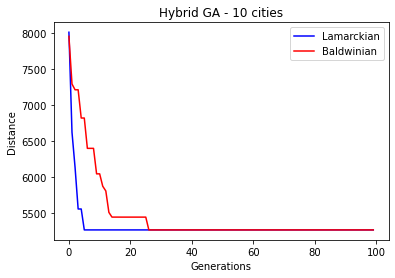

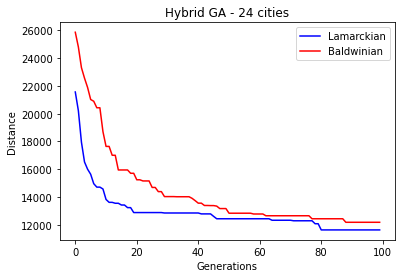

In [31]:
#modified operator function.
def operators(nPop,popList,mode):
    counter =0
    while counter <nPop:
        mutChance=random.random()
        if mutChance <0.01:
            popList[nPop+counter]=mutationOperators(hybridSelection(popList[0:nPop],mode))
            popList[nPop+counter+1]=mutationOperators(hybridSelection(popList[0:nPop],mode))
            counter=counter+2
        else:
            mutChild=recombinationOperators(hybridSelection(popList[0:nPop],mode),hybridSelection(popList[0:nPop],mode))
            popList[nPop+counter]=mutationOperators(mutChild[0])
            popList[nPop+counter+1]=mutationOperators(mutChild[1])
            counter=counter+2
    return popList

#Selection population
def hybridSelection(popList,mode):  
    #Saving the parents
    parents=random.sample(popList,int(len(popList)/10))
    parents=np.array(parents)
    #Saving the fitted parents and their distances
    fitedParents=parents.tolist()
    distanceFP=[]
    for i in range(len(fitedParents)):
        sW=swapingNeighbor(fitedParents[i])
        fitedParents[i]=sW[1]
        distanceFP.append(sW[0])
    parents=parents.tolist()
    
    #2 of the best fitted parents will be choosen
    if mode=="Lamarck":
        gene=distanceFP.index(min(distanceFP))
        parent=fitedParents[gene]
        fitedParents.remove(parent)
        distanceFP.remove(min(distanceFP))
        

    #2 parents will be choosen that are potentially best fitted.
    if mode=="Baldwin":
        gene=distanceFP.index(min(distanceFP))
        parent=parents[gene]
        parents.remove(parent)
        distanceFP.remove(min(distanceFP))

    return parent

#Selection of new population.
def eliteSelection(nPop,popList): 
    selectPop=[-1]*2*nPop
    for k in range(nPop):
        if distanceTour(popList[nPop+k])<distanceTour(popList[k]):
            selectPop[k]=popList[nPop+k]
        else:
            selectPop[k]=popList[k]   
    return selectPop

#Choosing intial population
def initialPop(nPop,nCities,mode):
    popList=[-1]*nPop*2
    for i in range(nPop):
            popList[i]=randomSearch(nCities)
    return popList


#Main function. From here everything is controlled.
def hybridGA(nPop,nCities,generation,mode):
    stime=time.time()
    popList=initialPop(nPop,nCities,mode)
    Gen=[]
    Fitness=[]
    iteration=0
    while iteration<generation:
        Gen.append(iteration)
        Fitness.append(currentBestGen(nPop,popList[0:nPop]))
        popList=eliteSelection(nPop,operators(nPop,popList,mode))
        iteration=iteration+1
    etime=time.time()
    diffTime=etime-stime
    return Gen,Fitness,nCities,generation,diffTime,nPop,popList[0:nPop]

#Calculating times for the 2 diffrent algorithms
def hybridTours(mode):
    nPop=20
    nCities=[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    bestDist=[3168,3637,4817,4828,5273,6326,6334,6820,7375,8132,
          8386,8635,8697,9262,9888,9964,10031,10055,10838]
    Time=[]
    val=1
    for j in range(val):
        for i in range(len(nCities)):
            popList=initialPop(nPop,nCities[i],mode)
            stime=time.time()
            fitness=currentBestGen(nPop,popList)
            while bestDist[i]<fitness:
                fitness=currentBestGen(nPop,popList[0:nPop])
                popList=eliteSelection(nPop,operators(nPop,popList,mode))
           
            etime=time.time()
            Time.append(etime-stime)

    averageTime=[]
    for i in range(len(nCities)):
        tot=0
        for j in range(val):
            tot=tot+ Time[j*len(nCities)+i]
        tot=tot/val
        averageTime.append(tot)
    
    for i in range(len(averageTime)):
        if averageTime[i]==0:
            averageTime[i]=0.000001

    x=nCities     
    y=np.log(averageTime)
    C=np.polyfit(x,y,1)
    x=np.linspace(0,25,1000)
    y=np.exp(C[0]*x+C[1])
    return x,y

    
#Plotting the 3 diffrent algorithms
def compareTimePlot():
    plt.figure()
    plt.title(('Hybrid GA'))
    plt.xlabel('City (n)')
    plt.ylabel('Time (sec)')
    
    modes=["Lamarck","Baldwin"]
    Color=["blue","red"]
    for i in range(3):
        coord=hybridTours(modes[i])
        plt.plot(coord[0],coord[1],color=Color[i])
        
    plt.legend(['Lamarckian', 'Baldwinian'])
    plt.savefig('hybridTimes.png', dpi=300, bbox_inches='tight')
    

   
#plotting and printing table statstics.
def compareTablePlot():
    plt.figure()
    modes=["Lamarck","Baldwin"]
    Color=["blue","red","green"]
    parm=[]
    for i in range(2):
        parm.append(hybridGA(100,10,100,modes[i]))
               
        plt.plot(parm[i][0],parm[i][1],color=Color[i])
        
    plt.legend(['Lamarckian', 'Baldwinian', 'Pure GA'])
    plt.xlabel("Generations")
    plt.ylabel("Distance")
    plt.title("Hybrid GA - 10 cities")
    plt.savefig('hybridGen10.png', dpi=300, bbox_inches='tight')
    
    lastGenB=[]
    for i in range(len(parm[1][6])):
        lastGenB.append(distanceTour(parm[1][6][i]))
    
    lastGenL=[]
    for i in range(len(parm[0][6])):
        lastGenL.append(distanceTour(parm[0][6][i]))
        

    tours=100*100*100+10*100
    #stats for 10 cities
    data = {'Name':['Number of cities', 'Generations', 'Populaion', 'Routes ',
                    'time (s)','Best distance', 'Worst distance', 'Average distance', 
                    'Standard deviation'],
        
        'Baldwinian':[parm[0][2], parm[1][3], parm[0][5], tours,round(parm[1][4],2), round(min(lastGenB),2), round(max(lastGenB),2), round(np.mean(lastGenB),2),round(np.std(lastGenB),2)],
        'Lamarckian':[parm[0][2], parm[0][3], parm[0][5], tours,round(parm[0][4],2), round(min(lastGenL),2), round(max(lastGenL),2), round(np.mean(lastGenL),2),round(np.std(lastGenL),2)]}
    df = pd.DataFrame(data)
    parm=[]
    print(df)
    
    plt.figure()
    for i in range(2):
        parm.append(hybridGA(100,24,100,modes[i]))
               
        plt.plot(parm[i][0],parm[i][1],color=Color[i])
        
    plt.legend(['Lamarckian', 'Baldwinian', 'Pure GA'])
    plt.xlabel("Generations")
    plt.ylabel("Distance")
    plt.title("Hybrid GA - 24 cities")
    plt.savefig('hybridGen20.png', dpi=300, bbox_inches='tight')

    lastGenB=[]
    for i in range(len(parm[1][6])):
        lastGenB.append(distanceTour(parm[1][6][i]))
    
    lastGenL=[]
    for i in range(len(parm[0][6])):
        lastGenL.append(distanceTour(parm[0][6][i]))
    #stats for 24 cities
    data = {'Name':['Number of cities', 'Generations', 'Populaion', 'Routes ',
                    'time (s)','Best distance', 'Worst distance', 'Average distance', 
                    'Standard deviation'],
        
        'Baldwinian':[parm[0][2], parm[1][3], parm[0][5], tours,round(parm[1][4],2), round(min(lastGenB),2), round(max(lastGenB),2), round(np.mean(lastGenB),2),round(np.std(lastGenB),2)],
        'Lamarckian':[parm[0][2], parm[0][3], parm[0][5], tours,round(parm[0][4],2), round(min(lastGenL),2), round(max(lastGenL),2), round(np.mean(lastGenL),2),round(np.std(lastGenL),2)]}
    df = pd.DataFrame(data)
    print("------------")
    print(df)


                                                                        
def mainHybrid():
    #Uses some time
    #compareTimePlot()
    compareTablePlot()
    
    
mainHybrid()     